## No rooted-out branching - Method 1

In [1]:
%run ../imports.py

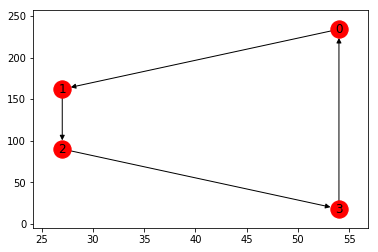

In [2]:
G = nx.DiGraph()
G.add_nodes_from([0,1,2,3])
G.add_edges_from([
    (0,1),
    (1,2),
    (2,3),
    (3,0)
])
N = nx.number_of_nodes(G)
layout = graphviz_layout(G, prog='dot')
nx.draw_networkx(G, pos=layout)

Find root, $r$

In [3]:
N = nx.number_of_nodes(G)
L = out_degree_laplacian(G)
np.linalg.matrix_rank(L)

3

### Symmetrization

In [4]:
Q = orth_matrix(L).T
rL = np.matmul(Q, np.matmul(L, np.transpose(Q)))
sigma = solve_lyapunov(rL, np.identity(np.linalg.matrix_rank(L)))
x = 2*np.matmul(np.transpose(Q), np.matmul(sigma, Q))
eqL = np.linalg.pinv(x)

In [5]:
print(eqL)

[[ 1.00000000e+00 -5.00000000e-01 -2.22044605e-16 -5.00000000e-01]
 [-5.00000000e-01  1.00000000e+00 -5.00000000e-01  1.33226763e-15]
 [-2.22044605e-16 -5.00000000e-01  1.00000000e+00 -5.00000000e-01]
 [-5.00000000e-01 -1.66533454e-15 -5.00000000e-01  1.00000000e+00]]


In [6]:
eq_neg_G = nx.Graph()

for i in np.arange(0,N):
    for j in np.arange(i+1,N):
        if(eqL[i,j] > 1e-6):
            eq_neg_G.add_edge(i,j,weight=eqL[i,j])

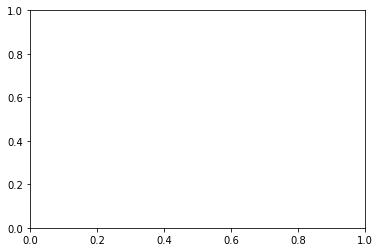

In [7]:
nx.draw_networkx(eq_neg_G, pos=layout)

/usr/local/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


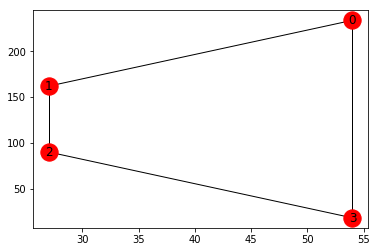

In [8]:
eq_pos_G = nx.Graph()

for i in np.arange(0,N):
    for j in np.arange(i+1,N):
        if(eqL[i,j] < -1e-6):
            eq_pos_G.add_edge(i,j,weight=eqL[i,j])

nx.draw_networkx(eq_pos_G, pos=layout)